O fluxo de trabalho do circuito consiste em seguir quatro etapas:

a) Construir: Projete circuito (s) quântico (s) que represente o problema que você está considerando.

b) Compilar: Compila circuitos para um serviço quântico específico, por exemplo, um sistema quântico ou simulador clássico.

c) Execute: execute os circuitos compilados no serviço(s) quântico especificado. Esses serviços podem ser na nuvem ou locais.

d)  Analisar: Calcule estatísticas resumidas e visualize os resultados dos experimentos.
    
    
Fluxo passo-a-passo:

O trecho de código apresentado acima é composto de seis passos:

    1.Importar pacotes

    2.Inicializar variáveis

    3.Adicionar portas

    4.Visualizar o circuito

    5.Simular o experimento

    6.Visualizar os resultados




In [44]:
#Importar pacotes

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram



 Os imports são:

    QuantumCircuit: pode ser pensado como as instruções do sistema quântico. Ele contém todas as suas operações quânticas.

    AerSimulator: is the Aer high performance circuit simulator.

    plot_histogram: cria histogramas.


In [45]:
#Inicializar variáveis


circuit = QuantumCircuit(2, 2)


#inicializa com 2 qubits no estado zero; com 2 bits clássicos definidos para zero; e `` circuito`` é o circuito quântico.
#Sintaxe:
#QuantumCircuit(int, int)


In [46]:
#Adicionar portas:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

#É necessário adicionar portas (Operações) para manipular os registradores do seu circuito

As portas são adicionadas ao circuito uma a uma para formar o estado de Bell.

O código acima aplica as seguintes portas:

QuantumCircuit.h(0): Uma porta Hadamard no qubit 0, que coloca-o em um estado de superposição.

QuantumCircuit.cx(0, 1): Uma operação não controlada () no qubit de controle 0 e no qubit de destino 1, colocando os quibits em um estado de emaranhamento.

QuantumCircuit.measure([0,1], [0,1]): se  passar todos os registradores quânticos e clássicos para measure, o resultado da medição do i-ésimo qubit será armazenado no i-ésimo bit clássico.

In [47]:
#Visualizar o circuito:

circuit.draw()


#Utilizar qiskit.circuit.QuantumCircuit.draw() 
#para visualizar o circuito que você projetou nas várias formas usadas em muitos livros didáticos e artigos de pesquisa.



┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Neste circuito, os qubits são ordenados com qubit zero na parte superior e qubit um na parte inferior. O circuito é lido da esquerda para a direita, o que significa que as portas que são aplicadas anteriormente no circuito aparecem mais à esquerda.

O serviço padrão para QuantumCircuit.draw() ou qiskit.visualization.circuit_drawer() é o serviço de texto. No entanto, dependendo do seu ambiente local, você pode querer alterar estes padrões para algo mais apropriado ao seu caso de uso. Isso é feito com o arquivo de configuração do usuário. Por padrão, o arquivo de configuração do usuário deve estar localizado em ~/.qiskit/settings.conf e é um arquivo .ini.

Por exemplo, um arquivo settings.conf para configurar um drawer do Matplotlib é:

In [48]:

#circuit_drawer = mpl

In [49]:
#Simular o experimento:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy     


simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 4921, '11': 5079}


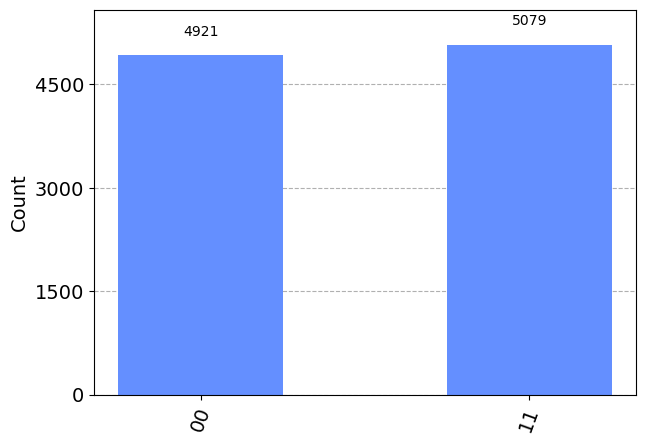

In [50]:
plot_histogram(counts)

In [31]:
import numpy as np
from qiskit import QuantumCircuit

In [32]:
circ = QuantumCircuit(3, 3)

In [33]:
#Portas para gerar o estado de Bell.
circ.h(0)

circ.cx(0, 1)

circ.cx(0, 2)

#circuit.measure([0, 1], [0, 1])

In [34]:
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c: 3/═══════════════

In [35]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw("latex")

<IPython.core.display.Latex object>

In [36]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

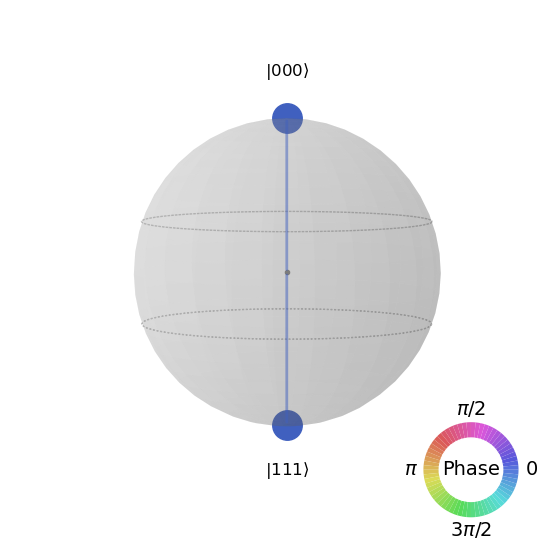

In [37]:
state.draw('qsphere')

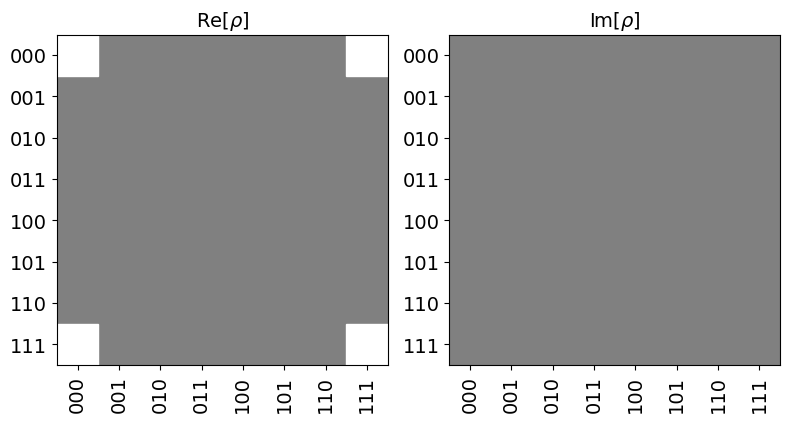

In [38]:
state.draw('hinton')

Representação unitária de um circuito.

O módulo quant_info do Qiskit também possui um método operador que pode ser usado para criar um operador unitário para o circuito. Isso calcula o matriz que representa o circuito quântico.

In [51]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [52]:
# Criando o circuito
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# mapeia a medição quântica para os bits clássicos
meas.measure(range(3), range(3))

# O objeto circuito Qiskit suporta composição.
# Aqui o meas tem que ser primeiro e front=True (colocando antes)
# como compose deve colocar um circuito menor em um maior.
qc = meas.compose(circ, range(3), front=True)

#desenhando o circuito
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [56]:

from qiskit import transpile

# Usar AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Primeiro temos que transpilar o circuito quântico
# para as instruções QASM de baixo nível usadas pelo
# Processo interno
qc_compiled = transpile(qc, backend)
# Execute o circuito no simulador qasm.
# Definimos o número de repetições do circuito
# para ser 1024, que é o padrão.

job_sim = backend.run(qc_compiled, shots=1024000)

# Pegue os resultados do trabalho.
result_sim = job_sim.result()

In [57]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 511920, '000': 512080}


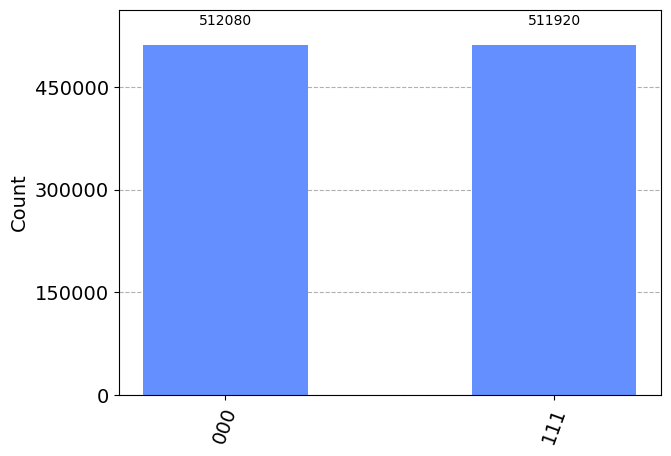

In [58]:
plot_histogram(counts)